# Creating the Model 1.2

In [15]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
# the model to be used
from sklearn.ensemble import RandomForestRegressor
#in order to calculate our error
from sklearn.metrics import mean_absolute_error
# to get appropriate hyperparameters
from sklearn.model_selection import GridSearchCV




In [16]:
#load the data
train_data = pd.read_csv('train_aggr5.csv')

In [17]:
#view the data
train_data.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,hour_booked,day,p_filled,m,number_of_tickets
0,1442,2017-10-17,435,Migori,0,49,7,2,0.02,10,1.0
1,5437,2017-11-19,432,Migori,0,49,7,0,0.02,11,1.0
2,5710,2017-11-26,425,Keroka,0,49,7,0,0.02,11,1.0
3,5777,2017-11-27,430,Homa Bay,0,49,7,1,0.10,11,5.0
4,5778,2017-11-27,432,Migori,0,49,7,1,0.63,11,31.0


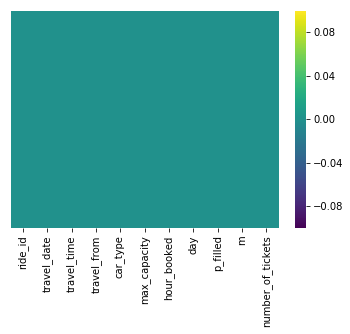

In [18]:
# check if the data has missing points with seaborn heatmap
sns.heatmap(train_data.isnull(),yticklabels=False, cmap='viridis')

In [19]:
# There are no missing values from the data
# check the datatypes
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 11 columns):
ride_id              51645 non-null int64
travel_date          51645 non-null object
travel_time          51645 non-null int64
travel_from          51645 non-null object
car_type             51645 non-null int64
max_capacity         51645 non-null int64
hour_booked          51645 non-null int64
day                  51645 non-null int64
p_filled             51645 non-null float64
m                    51645 non-null int64
number_of_tickets    51645 non-null float64
dtypes: float64(2), int64(7), object(2)
memory usage: 4.3+ MB


In [20]:
train_data.columns

Index(['ride_id', 'travel_date', 'travel_time', 'travel_from', 'car_type',
       'max_capacity', 'hour_booked', 'day', 'p_filled', 'm',
       'number_of_tickets'],
      dtype='object')

In [21]:
train_data['travel_time'] = train_data['travel_time'].astype('object', copy=False)

In [22]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 11 columns):
ride_id              51645 non-null int64
travel_date          51645 non-null object
travel_time          51645 non-null object
travel_from          51645 non-null object
car_type             51645 non-null int64
max_capacity         51645 non-null int64
hour_booked          51645 non-null int64
day                  51645 non-null int64
p_filled             51645 non-null float64
m                    51645 non-null int64
number_of_tickets    51645 non-null float64
dtypes: float64(2), int64(6), object(3)
memory usage: 4.3+ MB


In [24]:
# All the data should be integer values 
# converting strings to numerical variables.
#convert the travel_time to seconds
#train_data["travel_time"] = train_data["travel_time"].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))

In [25]:
train_data.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,hour_booked,day,p_filled,m,number_of_tickets
0,1442,2017-10-17,435,Migori,0,49,7,2,0.02,10,1.0
1,5437,2017-11-19,432,Migori,0,49,7,0,0.02,11,1.0
2,5710,2017-11-26,425,Keroka,0,49,7,0,0.02,11,1.0
3,5777,2017-11-27,430,Homa Bay,0,49,7,1,0.10,11,5.0
4,5778,2017-11-27,432,Migori,0,49,7,1,0.63,11,31.0


In [26]:
#replacing the cartype with boolean values
#train_data['car_type'] = pd.get_dummies(train_data['car_type'],drop_first=True)


In [27]:
#converting the date to the day of the week
#train_data['travel_date'] = pd.to_datetime(train_data['travel_date'],infer_datetime_format=False)
#train_data['travel_date'] = train_data['travel_date'].dt.dayofweek 


In [28]:
train_data["travel_from"] = pd.Categorical(train_data["travel_from"])
travel_from_categories = train_data.travel_from.cat.categories
train_data["travel_from"] = train_data.travel_from.cat.codes


In [30]:
#removing the - from the date
train_data['travel_date'] = train_data['travel_date'].str.replace("-","")

In [31]:
train_data.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,hour_booked,day,p_filled,m,number_of_tickets
0,1442,20171017,435,9,0,49,7,2,0.02,10,1.0
1,5437,20171119,432,9,0,49,7,0,0.02,11,1.0
2,5710,20171126,425,4,0,49,7,0,0.02,11,1.0
3,5777,20171127,430,1,0,49,7,1,0.10,11,5.0
4,5778,20171127,432,9,0,49,7,1,0.63,11,31.0


In [32]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 11 columns):
ride_id              51645 non-null int64
travel_date          51645 non-null object
travel_time          51645 non-null object
travel_from          51645 non-null int8
car_type             51645 non-null int64
max_capacity         51645 non-null int64
hour_booked          51645 non-null int64
day                  51645 non-null int64
p_filled             51645 non-null float64
m                    51645 non-null int64
number_of_tickets    51645 non-null float64
dtypes: float64(2), int64(6), int8(1), object(2)
memory usage: 4.0+ MB


In [33]:
# converting all datatypes to integers
train_data = train_data.astype('int64', copy=False)

In [34]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 11 columns):
ride_id              51645 non-null int64
travel_date          51645 non-null int64
travel_time          51645 non-null int64
travel_from          51645 non-null int64
car_type             51645 non-null int64
max_capacity         51645 non-null int64
hour_booked          51645 non-null int64
day                  51645 non-null int64
p_filled             51645 non-null int64
m                    51645 non-null int64
number_of_tickets    51645 non-null int64
dtypes: int64(11)
memory usage: 4.3 MB


# Training the Model!

In [13]:
# set the x-values and y values to feed the model
x = train_data.drop(["number_of_tickets"], axis=1)
y = train_data.number_of_tickets

In [14]:
#rf = RandomForestRegressor(random_state = 42)
#from pprint import pprint
# Look at parameters used by our current forest
#print('Parameters currently in use:\n')
#pprint(rf.get_params())

In [15]:
#from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
#max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth.append(None)
# Minimum number of samples required to split a node
#min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
#min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
# Create the random grid
#random_grid = {'n_estimators': n_estimators,
 #              'max_features': max_features,
  #             'max_depth': max_depth,
  #             'min_samples_split': min_samples_split,
   #            'min_samples_leaf': min_samples_leaf,
    #           'bootstrap': bootstrap}
#pprint(random_grid)

In [16]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
#rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
#rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
#rf_random.fit(x,y)

In [17]:
#rf_random.best_params_

In [18]:
# create a base model
model = RandomForestRegressor(max_features='auto', n_estimators=400,min_samples_leaf=4,
                              max_depth=80,min_samples_split=10,bootstrap=True,criterion='mae',n_jobs=-1)

In [19]:
# Instantiate the grid search model
#grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          #cv = 3, n_jobs = -1, verbose = 2)

In [20]:
# Fit the grid search to the data
#grid_search.fit(x, y)
#grid_search.best_params_(50)

#model_random.best_params_
model.fit(x,y)

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=80,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [21]:

pred_train = model.predict(x)
print (mean_absolute_error(pred_train,y))

1.6629938522606251


# predicting

In [35]:

#loading test data
test_data = pd.read_csv('test_questions.csv')

In [36]:
test_data

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,247,2018-05-07,07:06,Kisii,Nairobi,Bus,49
1,256,2018-05-06,11:08,Kisii,Nairobi,shuttle,11
2,275,2018-05-04,05:00,Kisii,Nairobi,shuttle,11
3,285,2018-05-04,09:10,Kisii,Nairobi,shuttle,11
4,286,2018-05-04,09:20,Kisii,Nairobi,shuttle,11
5,287,2018-05-04,07:02,Kisii,Nairobi,Bus,49
6,288,2018-05-04,09:30,Kisii,Nairobi,shuttle,11
7,292,2018-05-04,19:03,Kisii,Nairobi,Bus,49
8,298,2018-05-04,09:00,Kisii,Nairobi,shuttle,11
9,302,2018-05-04,08:40,Kisii,Nairobi,shuttle,11


In [37]:
#columns = ['max_capacity']
#s = columns
#test_data2 = test_data.drop(s, axis=1)

In [38]:
test_data.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,247,2018-05-07,07:06,Kisii,Nairobi,Bus,49
1,256,2018-05-06,11:08,Kisii,Nairobi,shuttle,11
2,275,2018-05-04,05:00,Kisii,Nairobi,shuttle,11
3,285,2018-05-04,09:10,Kisii,Nairobi,shuttle,11
4,286,2018-05-04,09:20,Kisii,Nairobi,shuttle,11


In [39]:
# convert all the data to numerical variables
#convert the travel_time to seconds
test_data['travel_time'] = test_data['travel_time'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))

In [40]:
#replacing the cartype with boolean values
test_data['car_type'] = pd.get_dummies(test_data['car_type'],drop_first=True)
#converting the date to the day of the week
test_data['travel_date'] = pd.to_datetime(test_data['travel_date'],infer_datetime_format=False)
test_data['travel_date'] = test_data['travel_date'].dt.dayofweek 
# giving the travel_from categorical values
test_data["travel_from"] = pd.Categorical(test_data["travel_from"])
travel_from_categories = test_data.travel_from.cat.categories
test_data["travel_from"] = test_data.travel_from.cat.codes
#converting the travel_to to dummy values
test_data['travel_to'] = pd.get_dummies(test_data['travel_to'])



In [41]:
test_data.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,247,0,426,5,1,0,49
1,256,6,668,5,1,1,11
2,275,4,300,5,1,1,11
3,285,4,550,5,1,1,11
4,286,4,560,5,1,1,11


In [42]:
x_test = test_data.drop(['ride_id'], axis=1)
test_pred = model.predict(x_test)

In [43]:
q = {'ride_id': test_data["ride_id"], 'number_of_ticket': test_pred}
df_pred = pd.DataFrame(data=q)
df_pred = df_pred[['ride_id','number_of_ticket']]

In [44]:
df_pred.head()

,ride_id,number_of_ticket
0,247,2.5025
1,256,2.5025
2,275,2.5025
3,285,2.5025
4,286,2.5025


In [45]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 2 columns):
ride_id             1111 non-null int64
number_of_ticket    1111 non-null float64
dtypes: float64(1), int64(1)
memory usage: 17.4 KB


In [46]:
df_pred

,ride_id,number_of_ticket
0,247,2.5025
1,256,2.5025
2,275,2.5025
3,285,2.5025
4,286,2.5025
5,287,2.5025
6,288,2.5025
7,292,2.5025
8,298,2.5025
9,302,2.5025


In [47]:
df_pred.to_csv('pred_set12.csv', index=False) #save to csv file